In [2]:
# Homework 9 - The first task for this homework was to build a chart using data from two seperate sources and plot the data using correlation, linear regression or another technique.

In [3]:
# The first data source I will use is presidential polling data for Barack Obama, which I will scrape using pandas from Rasmussen Reports 

In [1]:
import pandas as pd

Obama_Approval = pd.read_html('https://www.rasmussenreports.com/public_content/politics/obama_administration/obama_approval_index_history')

# Loading and cleaning the data 

DF_Obama_Approval = Obama_Approval[0]

DF_Obama_Approval["Date"] = pd.to_datetime(DF_Obama_Approval["Date"])
DF_Obama_Approval['Total Approve'] = DF_Obama_Approval['Total Approve'].str.replace('%',' ')
DF_Obama_Approval['Total Approve'] = pd.to_numeric(DF_Obama_Approval['Total Approve'], errors ='coerce')
DF_Obama_Approval.dropna(subset = ["Total Approve"], inplace=True)

# Implementing a month lag

DF_Obama_Approval['Date'] = pd.DatetimeIndex(DF_Obama_Approval['Date']) + pd.DateOffset(months = -1)



In [4]:
# The second data set I will use is the weekly 'US All Grades All Formulations Gasoline Price', which I will download from the Fred API.

In [5]:
# Importing the required packages to download the data from the api.

import requests

import os 

import json

from google.colab import files

In [6]:
# Downloading the Json file from the Fred api and loading it into a pandas data frame 

url = 'https://api.stlouisfed.org/fred/series/observations?series_id=GASALLW&api_key=e725511ce5615fe46441618aca9c09bf&file_type=json'

data = requests.get(url)

Retail_Gasoline_Consumer_Price = data.json()

Observations = Retail_Gasoline_Consumer_Price['observations']

Retail_Gasoline_Consumer_Price_Array=[]

for x in Observations:
  temp_variable={'date':x['date'],'value':x['value']}
  Retail_Gasoline_Consumer_Price_Array.append(temp_variable)

DF_Retail_Gasoline_Price  = pd.DataFrame(Retail_Gasoline_Consumer_Price_Array)

# Adding New Column Names 

DF_Retail_Gasoline_Price.columns = ['Date','Retail Price of Gasoline (Dollars per Gallon)']

# Formatting Dates

DF_Retail_Gasoline_Price['Date'] = pd.to_datetime(DF_Retail_Gasoline_Price['Date'])

# Formatting Price Index

DF_Retail_Gasoline_Price['Retail Price of Gasoline (Dollars per Gallon)'] = pd.to_numeric(DF_Retail_Gasoline_Price['Retail Price of Gasoline (Dollars per Gallon)'], errors ='coerce')

DF_Retail_Gasoline_Price

,Date,Retail Price of Gasoline (Dollars per Gallon)
0,1993-04-05,1.068
1,1993-04-12,1.079
2,1993-04-19,1.079
3,1993-04-26,1.086
4,1993-05-03,1.086
...,...,...
1495,2021-11-29,3.478
1496,2021-12-06,3.440
1497,2021-12-13,3.414
1498,2021-12-20,3.395


In [8]:
# Merging the data from the two data sources to create a single data set 

DF_Obama_Approval_With_Gasoline_Prices = DF_Obama_Approval.merge(DF_Retail_Gasoline_Price, left_on='Date', right_on='Date')

DF_Obama_Approval_With_Gasoline_Prices

# DF_Obama_Approval_Weekly_With_Gasoline_Prices = DF_Obama_Approval_Weekly_With_Gasoline_Prices[(DF_Obama_Approval_Weekly_With_Gasoline_Prices['Date'].dt.year >= 2011)]



,Date,Approval Index,Strongly Approve,Strongly Disapprove,Total Approve,Total Disapprove,Retail Price of Gasoline (Dollars per Gallon)
0,2017-02-13,+12,41%,29%,60.0,38%,2.418
1,2017-02-06,+7,38%,31%,58.0,41%,2.405
2,2017-01-30,+1,35%,34%,55.0,45%,2.408
3,2017-01-23,+4,36%,32%,56.0,43%,2.436
4,2017-01-16,+6,36%,30%,58.0,40%,2.467
...,...,...,...,...,...,...,...
367,2009-01-12,+28,43%,15%,67.0,31%,1.835
368,2009-01-05,+28,43%,15%,66.0,31%,1.737
369,2008-12-22,+19,40%,21%,61.0,36%,1.710
370,2008-12-15,+20,43%,23%,59.0,38%,1.716


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


y =  -2.63  * x +  56.85
R² =  0.14
Correlation Coefficient
 [[ 1.         -0.37607566]
 [-0.37607566  1.        ]]


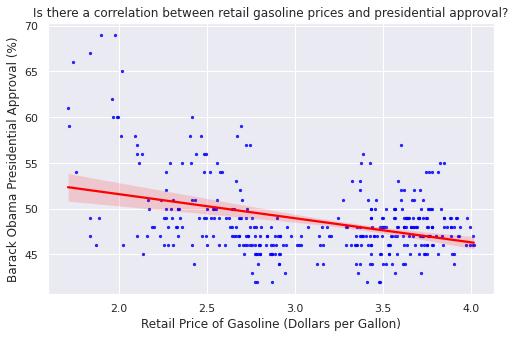

In [15]:
# Regressing Presidential Approval (Weekly Average) on the weekly Retail Price Price of Gasoline 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
figure(figsize=(8,5))
sns.set()
import numpy as np

x = DF_Obama_Approval_With_Gasoline_Prices['Retail Price of Gasoline (Dollars per Gallon)']

y = DF_Obama_Approval_With_Gasoline_Prices['Total Approve']

ax = sns.regplot(x, y, marker = 'o', scatter_kws={"color": "blue","s": 5}, line_kws={"color": "red"}).set_title('Is there a correlation between retail gasoline prices and presidential approval?')

# Calculating a regression equation and R^2 

from scipy.stats import linregress
slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

plt.ylabel( "Barack Obama Presidential Approval (%)" , size = 12 )

# Code to print regression equation and R^2 adapted from https://www.dropbox.com/sh/xkw12cmttvs2z93/AACmyjRIyCM0BxLGmFGES6Zpa/week10?dl=0&preview=Week10_06_Seaborn.ipynb&subfolder_nav_tracking=1

print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

# Calculating a correlation coefficient

print('Correlation Coefficient\n', (np.corrcoef(DF_Obama_Approval_With_Gasoline_Prices['Retail Price of Gasoline (Dollars per Gallon)'],DF_Obama_Approval_With_Gasoline_Prices['Total Approve'])))

# Saving the plot as an image

plt.savefig('Homework9_Advanced_Analytics.png')